# Análisis de Vinos y Supermercados

Este proyecto analiza dos conjuntos de datos diferentes: reseñas de vinos y ventas de supermercados, utilizando técnicas de visualización de datos para extraer insights relevantes.

In [1]:
# ¡Evidentemente puedes importar más bibliotecas
# si lo necesitas!
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.rcParams.update({'font.size': 14})
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches



In [2]:
# Hacer que los gráficos de matplotlib tengan
# una resolución decente en Jupyter:
%config InlineBackend.figure_format = 'retina'

# Primera parte: Vinos

En esta primera parte, trabajaremos con el dataset [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews). En éste, tenemos la información de un gran número de vinos como el nombre, el país de procedencia, el precio o la puntuación. Toda esta información ha sido scrapeada de la página [wine enthusiast](https://www.winemag.com/).

Con este dataset y la ayuda de nuestros gráficos extraeremos cierta información de interes.

In [3]:
wine_df = pd.read_csv("./winemag-data-130k-v2.csv")

wine_df.sample(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
36555,36555,France,Black fruits and rich tannins bring out the fr...,L'Aurore des Côtes,90,22.0,Beaujolais,Chiroubles,NaN,Roger Voss,@vossroger,Fabien Collonge 2013 L'Aurore des Côtes (Chir...,Gamay,Fabien Collonge
81382,81382,US,"Pricey for the variety, especially considering...",NaN,82,22.0,California,Napa Valley,Napa,NaN,NaN,Peju 2000 Sauvignon Blanc (Napa Valley),Sauvignon Blanc,Peju
110679,110679,US,"This 100% varietal wine, a steal of a deal, wo...",Richard McDowell's Selection,90,16.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Toad Hollow 2015 Richard McDowell's Selection ...,Merlot,Toad Hollow
80381,80381,Portugal,"Young and fruity, this a crisp, lightly acid w...",Vista Rosé,84,9.0,Beiras,NaN,NaN,Roger Voss,@vossroger,Caves Aliança 2012 Vista Rosé Tinta Roriz (Bei...,Tinta Roriz,Caves Aliança
63311,63311,US,"Much like its companion Rumba Pinot, this is l...",Estate,87,32.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Cubanisimo Vineyards 2011 Estate Pinot Noir (W...,Pinot Noir,Cubanisimo Vineyards


## Ejercicio 1

Para comenzar, queremos conocer cuales son las regiones (columna *region_1*) más caras. Además, queremos mostrar a qué país pertenece cada una de estas regiones.

In [4]:
# Primero agrupo por región y calculo el precio maximo 
region_prices = wine_df.groupby('region_1')[['price', 'country']].agg({
    'price': 'max',
    'country': 'first'
})

top_regions = region_prices.sort_values(by="price",ascending=False).head(15).reset_index()
top_regions


,region_1,price,country
0,Médoc,3300.0,France
1,Pomerol,2500.0,France
2,La Romanée,2500.0,France
3,Arroyo Seco,2013.0,US
4,Margaux,1900.0,France
5,Saint-Émilion,1500.0,France
6,Pauillac,1500.0,France
7,Pessac-Léognan,1200.0,France
8,Musigny,973.0,France
9,Brunello di Montalcino,900.0,Italy


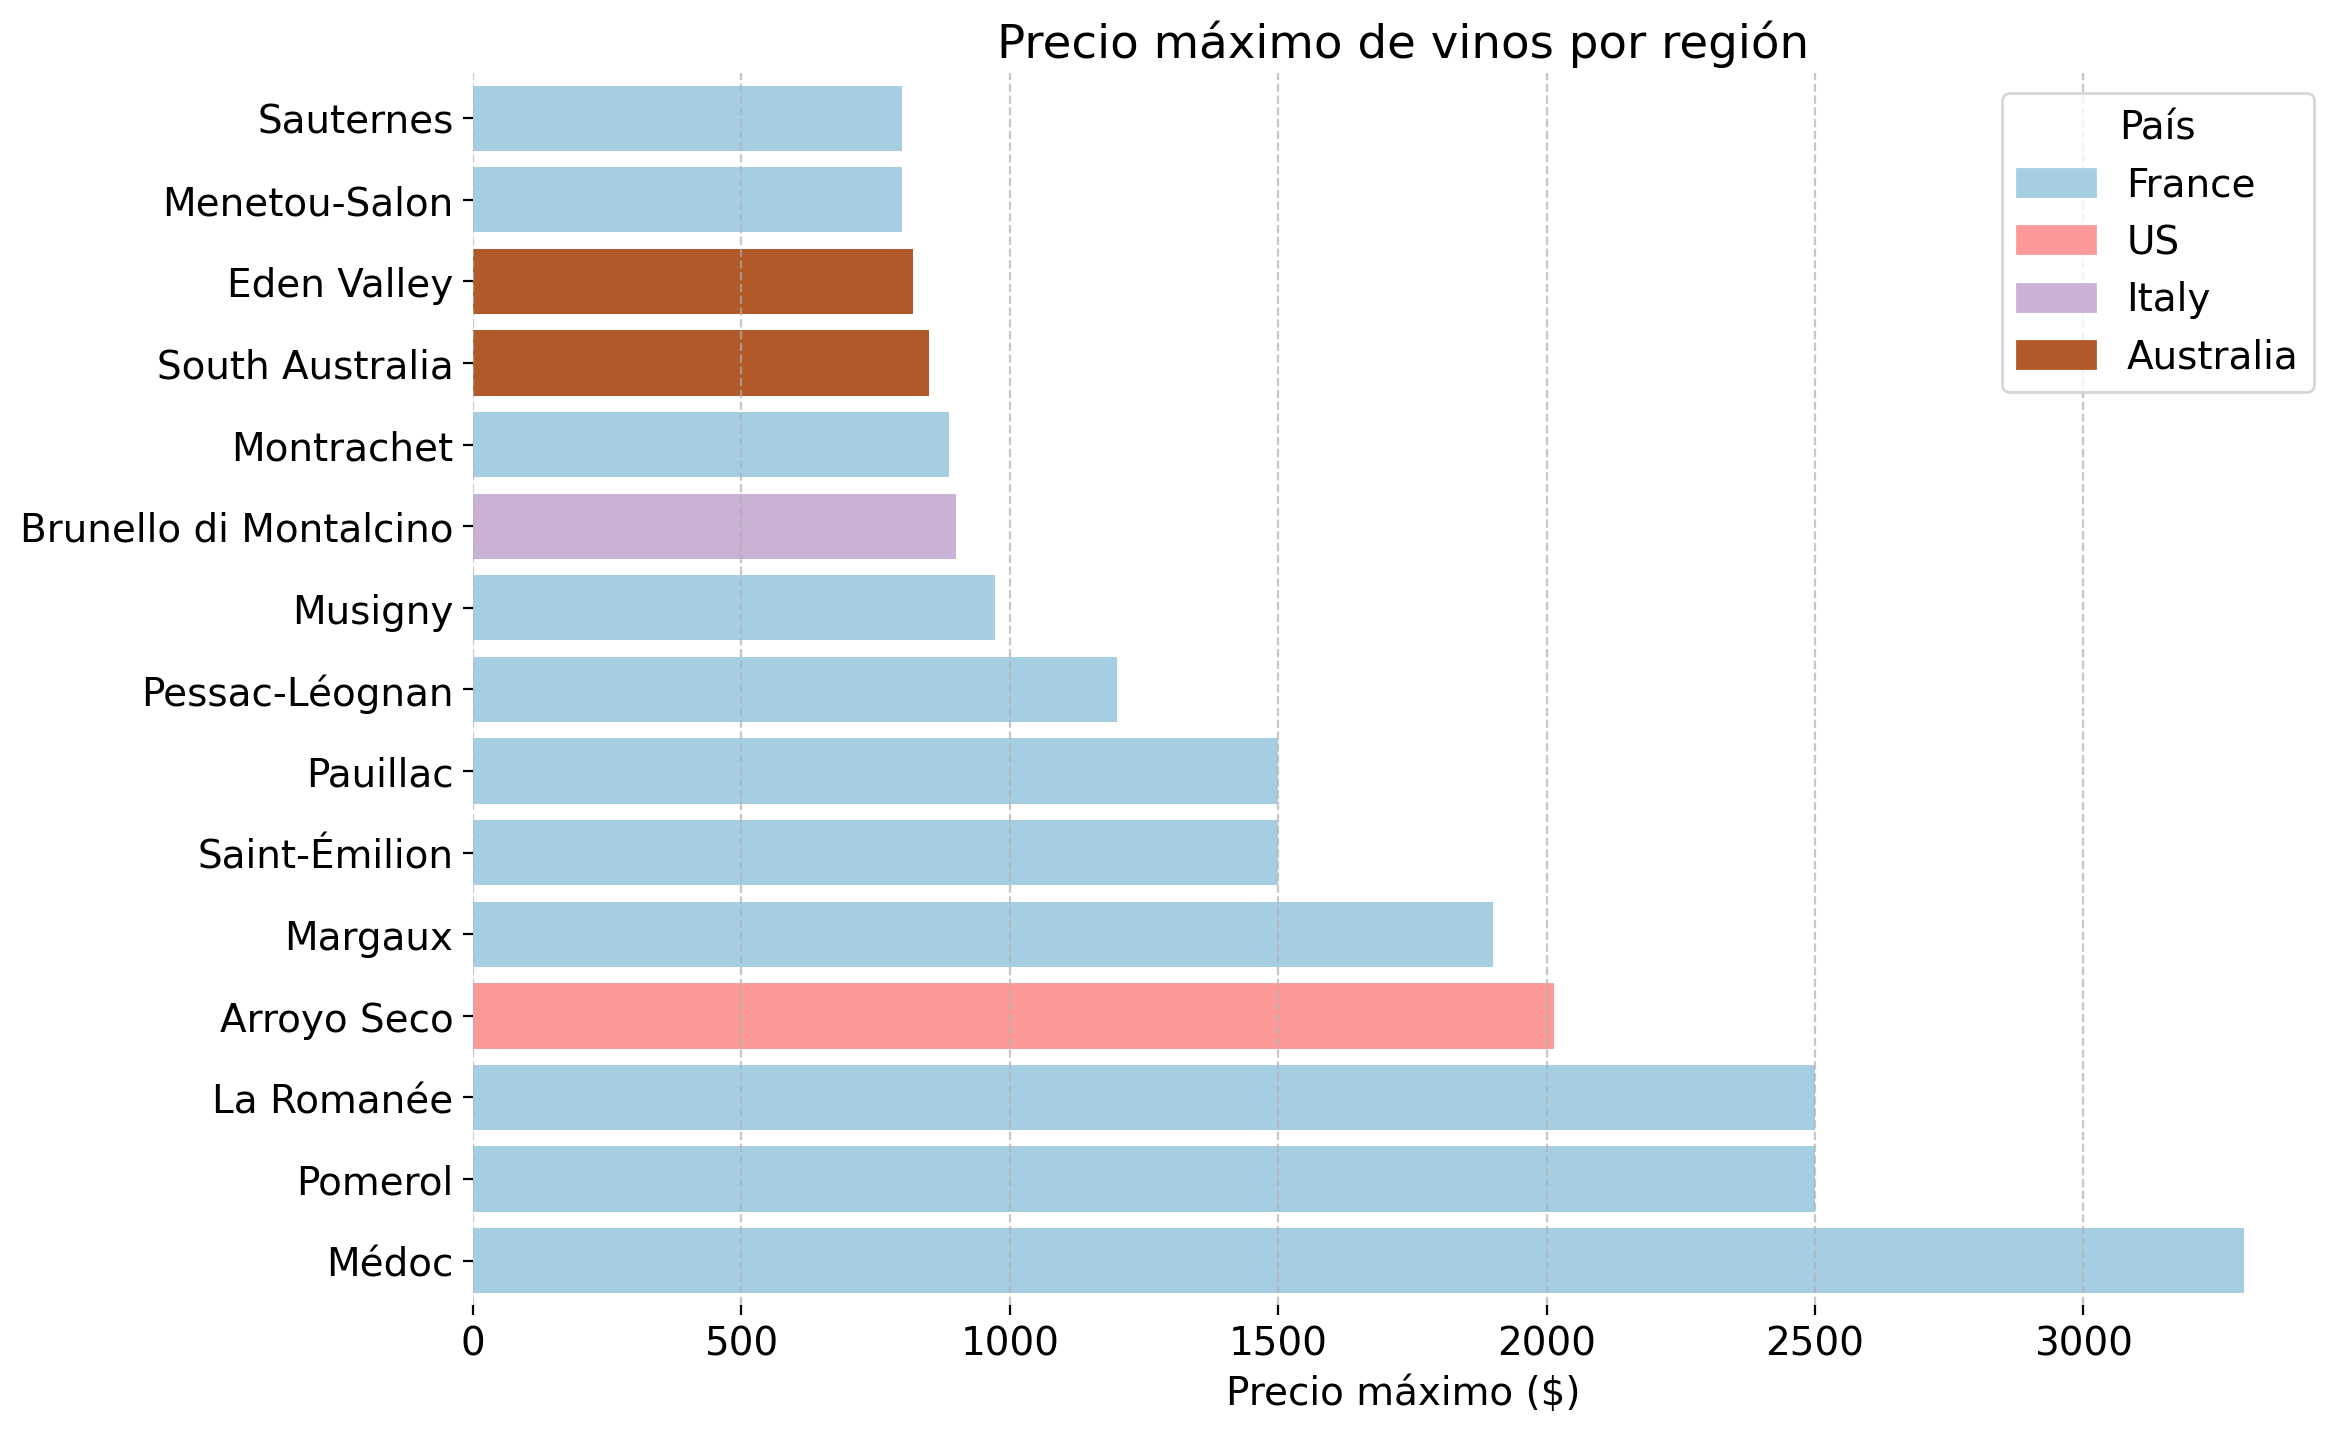

In [5]:
# Definimos una escala de colores
color_scale = plt.cm.Paired(np.linspace(0, 1, len(top_regions['country'].unique())))

country_color_map = {}
legend_entries = []

for i, country in enumerate(top_regions['country'].unique()):
    color = color_scale[i]
    country_color_map[country] = color
    legend_entries.append(mpatches.Patch(color=color, label=country))

bar_colors = [country_color_map[country] for country in top_regions['country']]

fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(top_regions['region_1'], top_regions['price'], color=bar_colors)

ax.grid(True, axis='x', linestyle='--', alpha=0.7)
ax.legend(handles=legend_entries, title='País')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_xlabel('Precio máximo ($)')
ax.set_title('Precio máximo de vinos por región')
ax.margins(y=0.01)

plt.show()

## Ejercicio 2

En este segundo ejercicio, nos gustaría saber, dentro de España, cuales son las regiones mejor valoradas. Además, nos gustaría destacar la comparativa entre las dos denominaciones de origen de tinto más conocidas: Rioja y Ribera de Duero.

In [6]:
# Filtramos el DataFrame para España y calculamos la puntuación media por región
spain_wines = wine_df[wine_df['country'] == 'Spain'].copy()
spain_wines = spain_wines[spain_wines['region_1'].notna()]

# Calculamos la puntuación media por región
region_ratings = spain_wines.groupby('region_1')[['points']].agg({
    'points': 'mean'
})

# Tomamos las top 30 regiones
top_regions = region_ratings.nlargest(30, 'points').reset_index()

top_regions

,region_1,points
0,Sardon de Duero,93.000000
1,Montilla-Moriles,91.055556
2,Dominio de Valdepusa,90.500000
3,Tierra del Viños de Zamora,90.142857
4,Jerez,89.919355
5,Priorat,89.660156
6,Tarragona,89.400000
7,Arribes del Duero,89.000000
8,Manzanilla-Sanlúcar de Barrameda,89.000000
9,Toro,88.880383


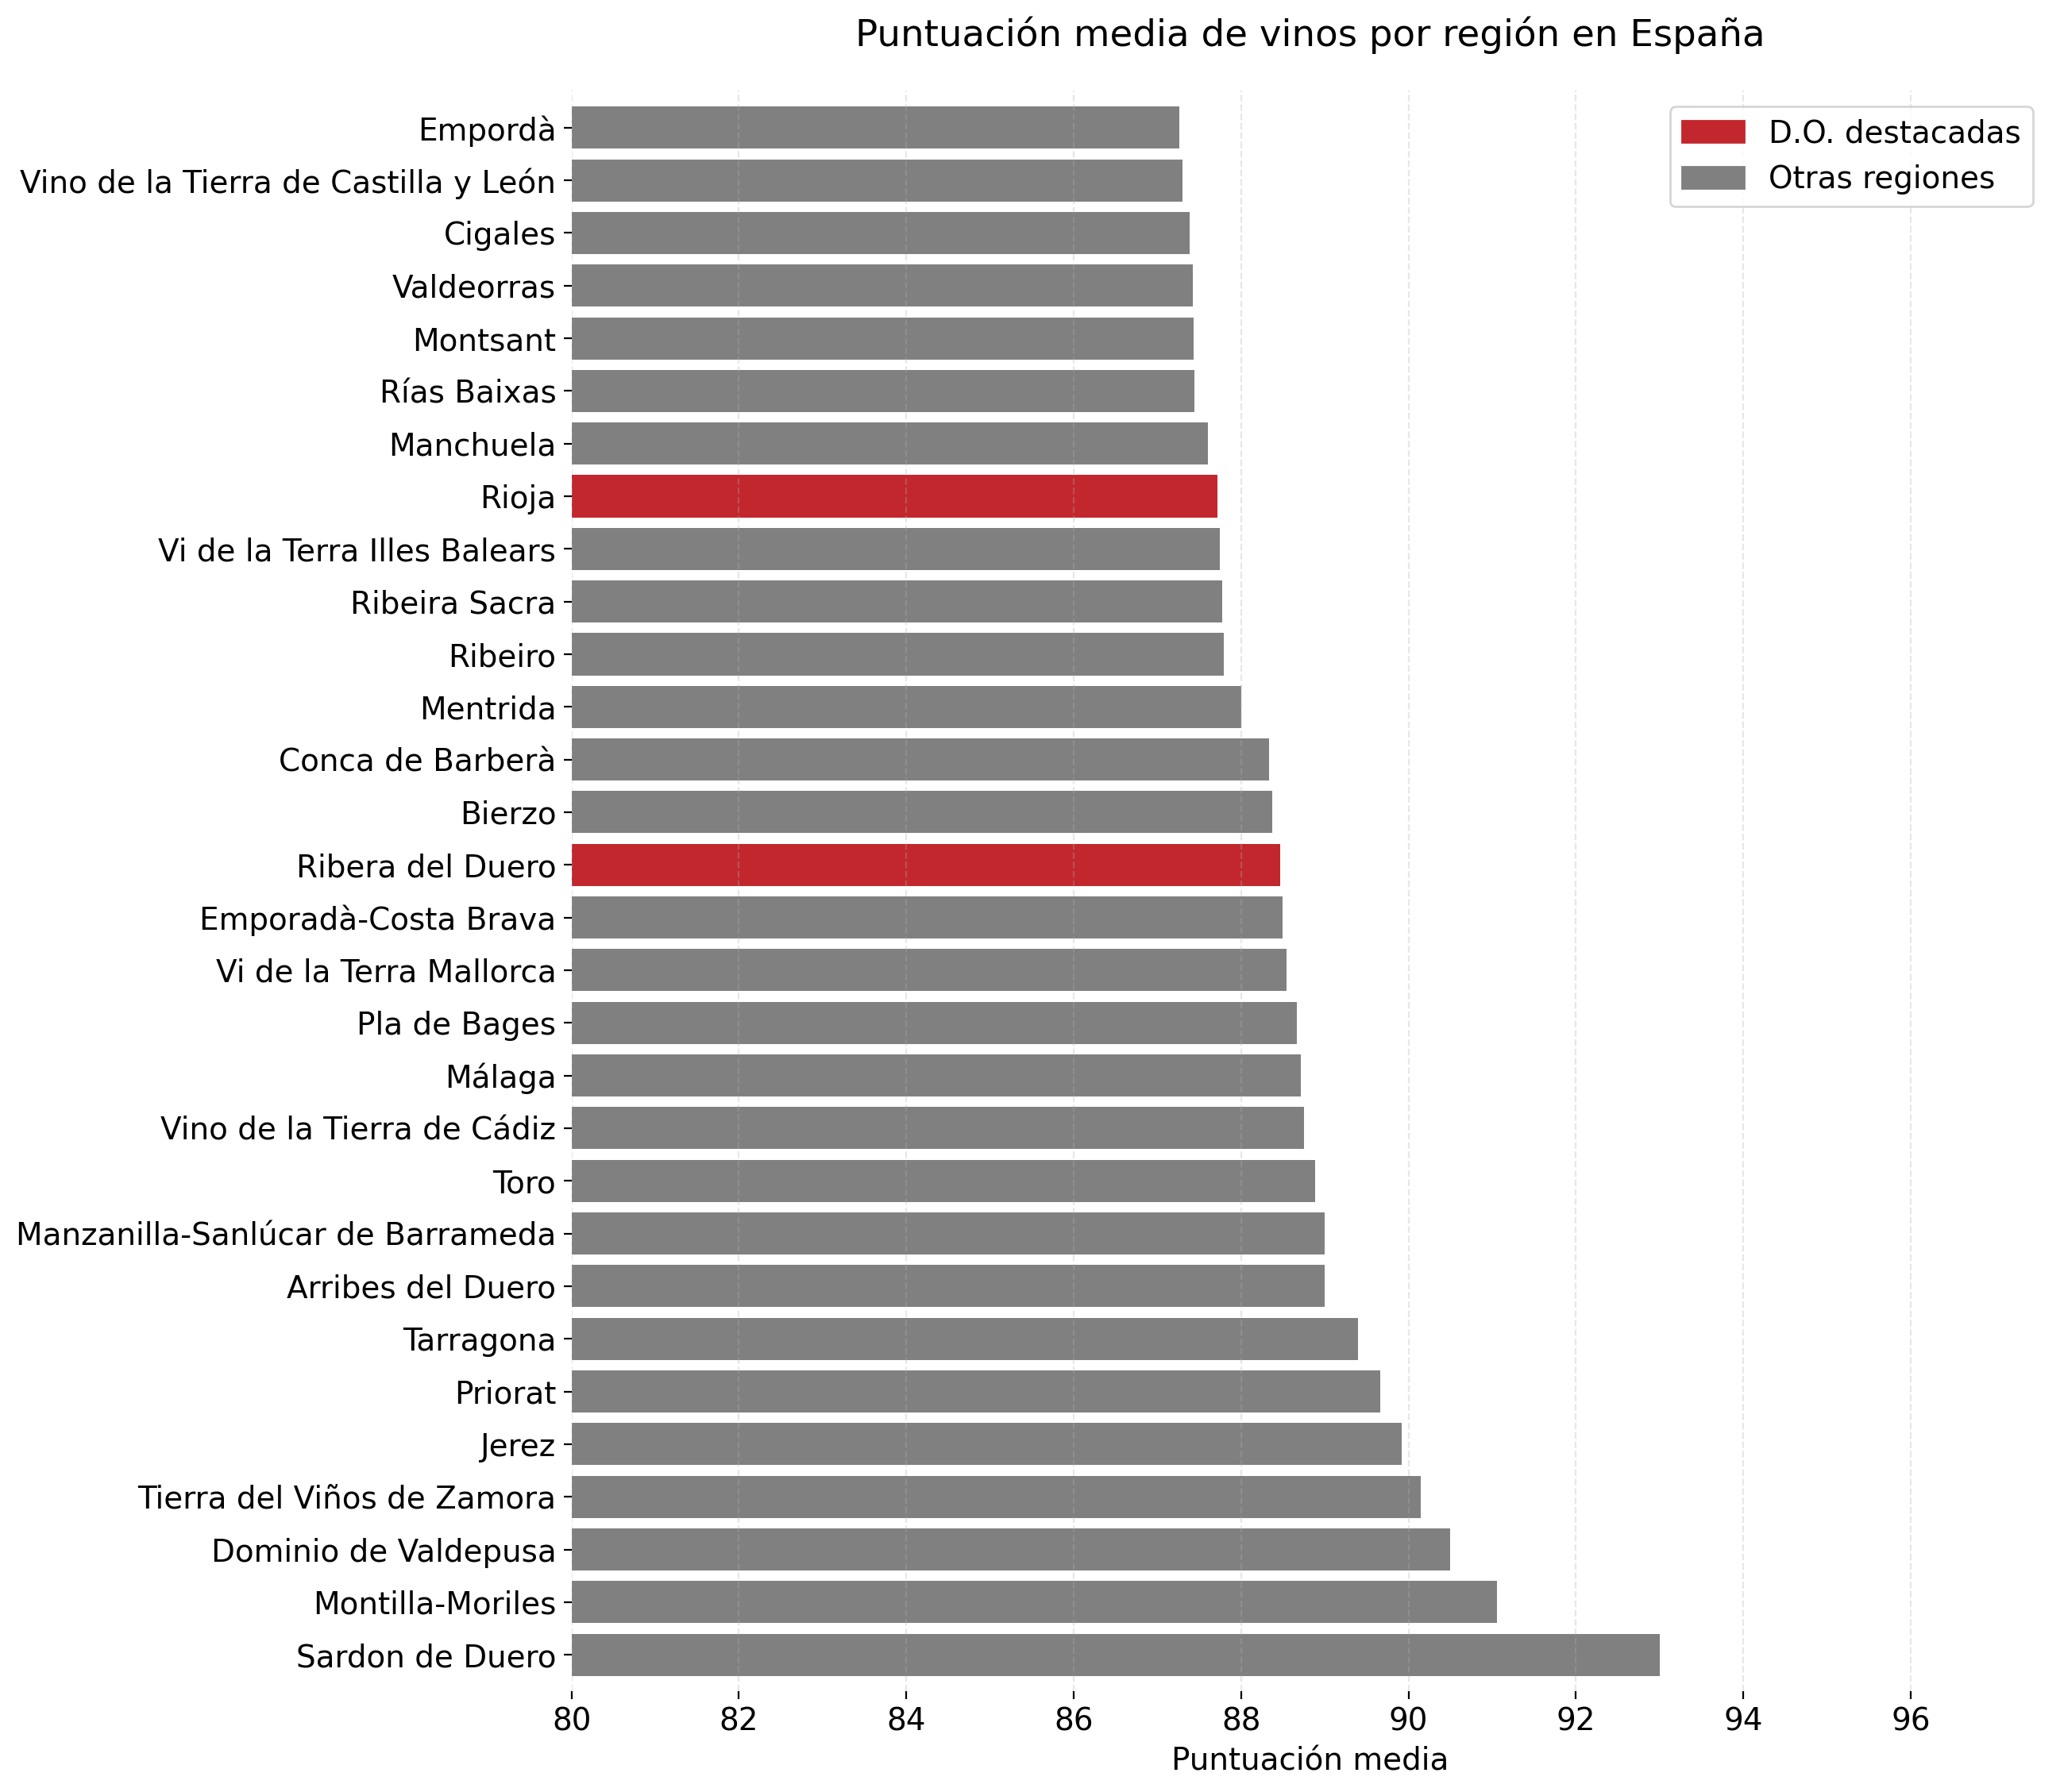

In [7]:
# Definimos las regiones a destacar
highlight_regions = ['Rioja', 'Ribera del Duero']

# Preparamos los colores para cada barra
bar_colors = []
for region in top_regions['region_1']:
    if region in highlight_regions:
        bar_colors.append('#C1272D')  # Rojo vino para las regiones destacadas
    else:
        bar_colors.append('#808080')  # Gris para el resto

fig, ax = plt.subplots(figsize=(12, 12))

plt.subplots_adjust(top=0.95)

bars = ax.barh(top_regions['region_1'], top_regions['points'], color=bar_colors)

ax.grid(True, axis='x', linestyle='--', alpha=0.3)

legend_items = [
    mpatches.Patch(color='#C1272D', label='D.O. destacadas'),
    mpatches.Patch(color='#808080', label='Otras regiones')
]
ax.legend(handles=legend_items, loc='upper right')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_xlabel('Puntuación media')
ax.set_title('Puntuación media de vinos por región en España', y=1.02)
ax.margins(y=0.01)

ax.set_xlim(80, None)

plt.show()

# Segunda parte: Supermercados

Para la segunda parte del análisis cambiaremos al dataset [Supermarket sales](https://www.kaggle.com/aungpyaeap/supermarket-sales). Éste contiene la información de las ventas que se produjeron entre Enero y Marzo de 2019 en un supermercado anónimo. Encontramos categorías como la línea de producto de la compra o el género del comprador.

In [8]:
supermarket_sales_df = pd.read_csv("./supermarket_sales.csv")

supermarket_sales_df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
924,457-12-0244,C,Naypyitaw,Member,Female,Sports and travel,35.22,6,10.5660,221.8860,3/14/2019,13:49,Ewallet,211.32,4.761905,10.5660,6.5
505,726-29-6793,A,Yangon,Member,Male,Electronic accessories,24.18,8,9.6720,203.1120,1/28/2019,20:54,Ewallet,193.44,4.761905,9.6720,9.8
643,131-15-8856,C,Naypyitaw,Member,Female,Food and beverages,72.52,8,29.0080,609.1680,3/30/2019,19:26,Credit card,580.16,4.761905,29.0080,4.0
758,250-17-5703,A,Yangon,Member,Male,Food and beverages,18.85,10,9.4250,197.9250,2/27/2019,18:24,Ewallet,188.50,4.761905,9.4250,5.6
136,700-81-1757,A,Yangon,Normal,Female,Electronic accessories,26.31,5,6.5775,138.1275,1/18/2019,20:59,Credit card,131.55,4.761905,6.5775,8.8


In [9]:
supermarket_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [10]:
supermarket_sales_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## Ejercicio 3

Para tener una primera visión de los datos, nos gustaría conocer la venta bruta producida cada mes y la aportación de cada ciudad a esta cifra.

In [11]:
# Primero convertimos la fecha a datetime y extraemos el mes
supermarket_sales_df['Date'] = pd.to_datetime(supermarket_sales_df['Date'])
supermarket_sales_df['Month'] = supermarket_sales_df['Date'].dt.strftime('%Y-%m')

# Agrupamos por mes y ciudad para calcular las ventas brutas
monthly_city_sales = supermarket_sales_df.groupby(['Month', 'City'])['Total'].sum().unstack()

monthly_city_sales


City,Mandalay,Naypyitaw,Yangon
Month,,,
2019-01,37176.0585,40434.6810,38681.1285
2019-02,34424.2710,32934.9825,29860.1205
2019-03,34597.3425,37199.0430,37659.1215


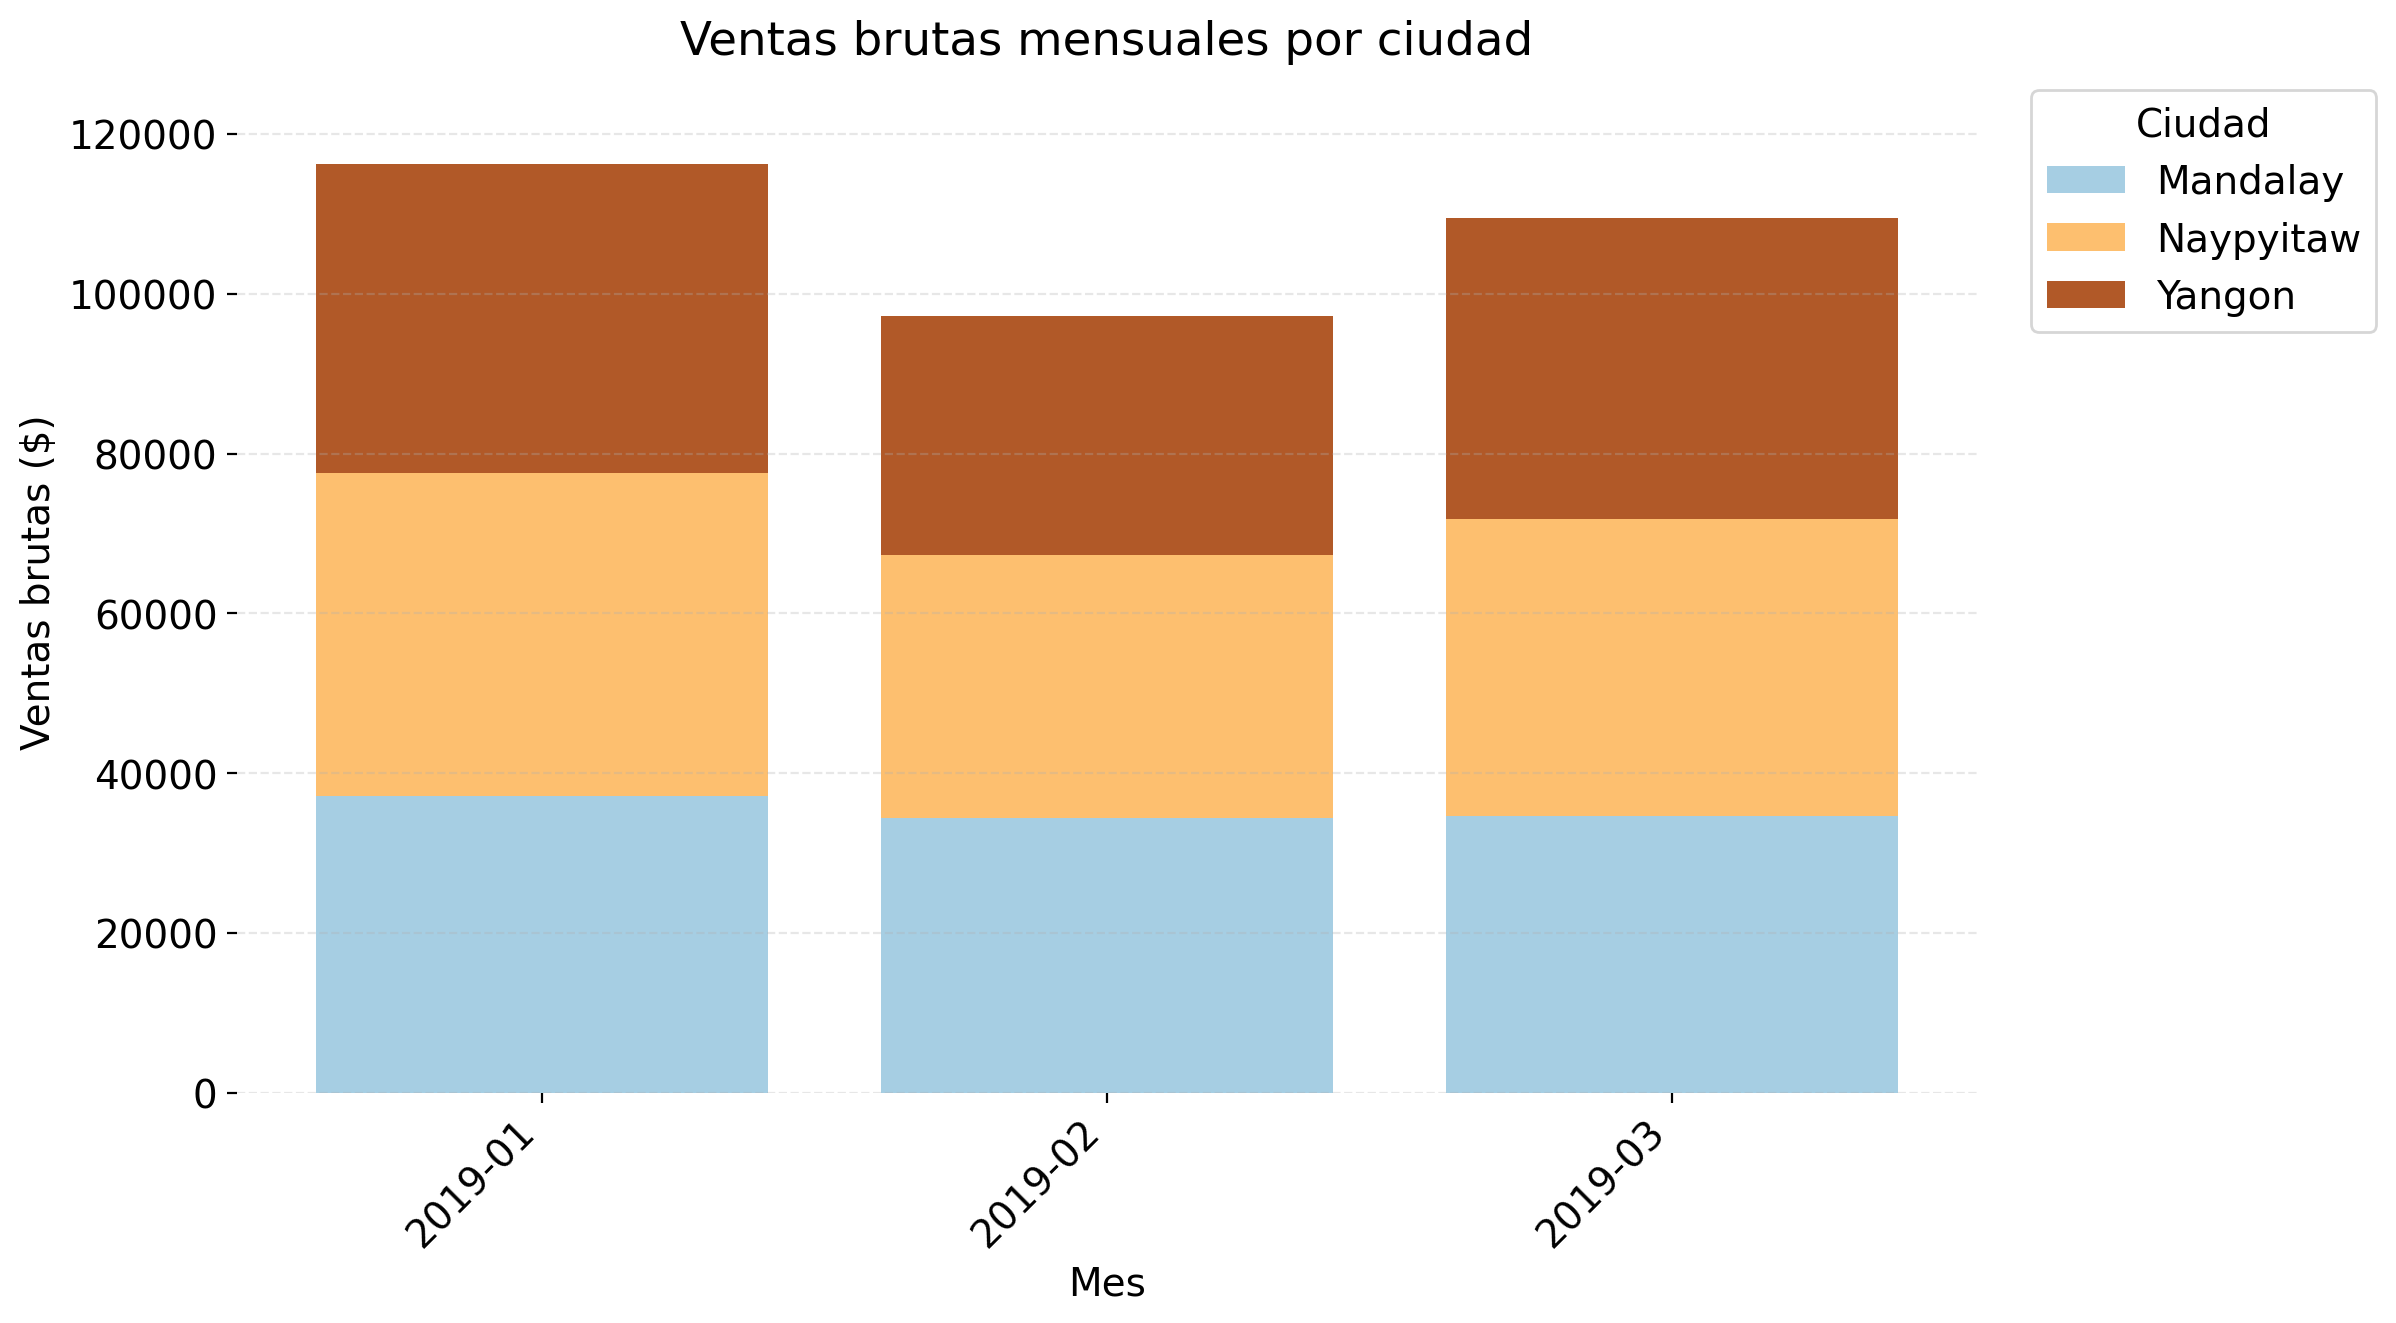

In [12]:
fig, ax = plt.subplots(figsize=(12, 7))

colors = plt.cm.Paired(np.linspace(0, 1, len(monthly_city_sales.columns)))

bottom = np.zeros(len(monthly_city_sales))

for i, city in enumerate(monthly_city_sales.columns):
    bars = ax.bar(monthly_city_sales.index, 
                  monthly_city_sales[city], 
                  bottom=bottom,
                  color=colors[i], 
                  label=city,
                  width=0.8)
    bottom += monthly_city_sales[city]

ax.grid(True, axis='y', linestyle='--', alpha=0.3)

ax.legend(title='Ciudad', 
         bbox_to_anchor=(1.02, 1),  # Posición fuera del gráfico
         loc='upper left')          # Alineada a la izquierda

for spine in ax.spines.values():
    spine.set_visible(False)

plt.xticks(rotation=45, ha='right')

ax.set_xlabel('Mes')
ax.set_ylabel('Ventas brutas ($)')
ax.set_title('Ventas brutas mensuales por ciudad')

plt.subplots_adjust(right=0.85, bottom=0.15)

ax.margins(y=0.1)

plt.show()

## Ejercicio 4

Un dato muy interesante de este dataset es el campo 'Product line', éste categoriza los productos en seis grupos: Health and beauty, Electronic accessories, Home and lifestyle, Sports and travel, Food and beverages, Fashion accessories.

Para conocer la forma que tienen de comprar los clientes de estos supermercados, nos gustaría visualizar cuánto se han gastado los hombres y las mujeres en cada una de estas categorías.

In [13]:
# Agrupamos por línea de producto y género, calculando el total de ventas
product_gender_sales = supermarket_sales_df.groupby(['Product line', 'Gender'])['Total'].sum().unstack()

product_gender_sales

Gender,Female,Male
Product line,,
Electronic accessories,27102.0225,27235.5090
Fashion accessories,30437.4000,23868.4950
Food and beverages,33170.9175,22973.9265
Health and beauty,18560.9865,30632.7525
Home and lifestyle,30036.8775,23825.0355
Sports and travel,28574.7210,26548.1055


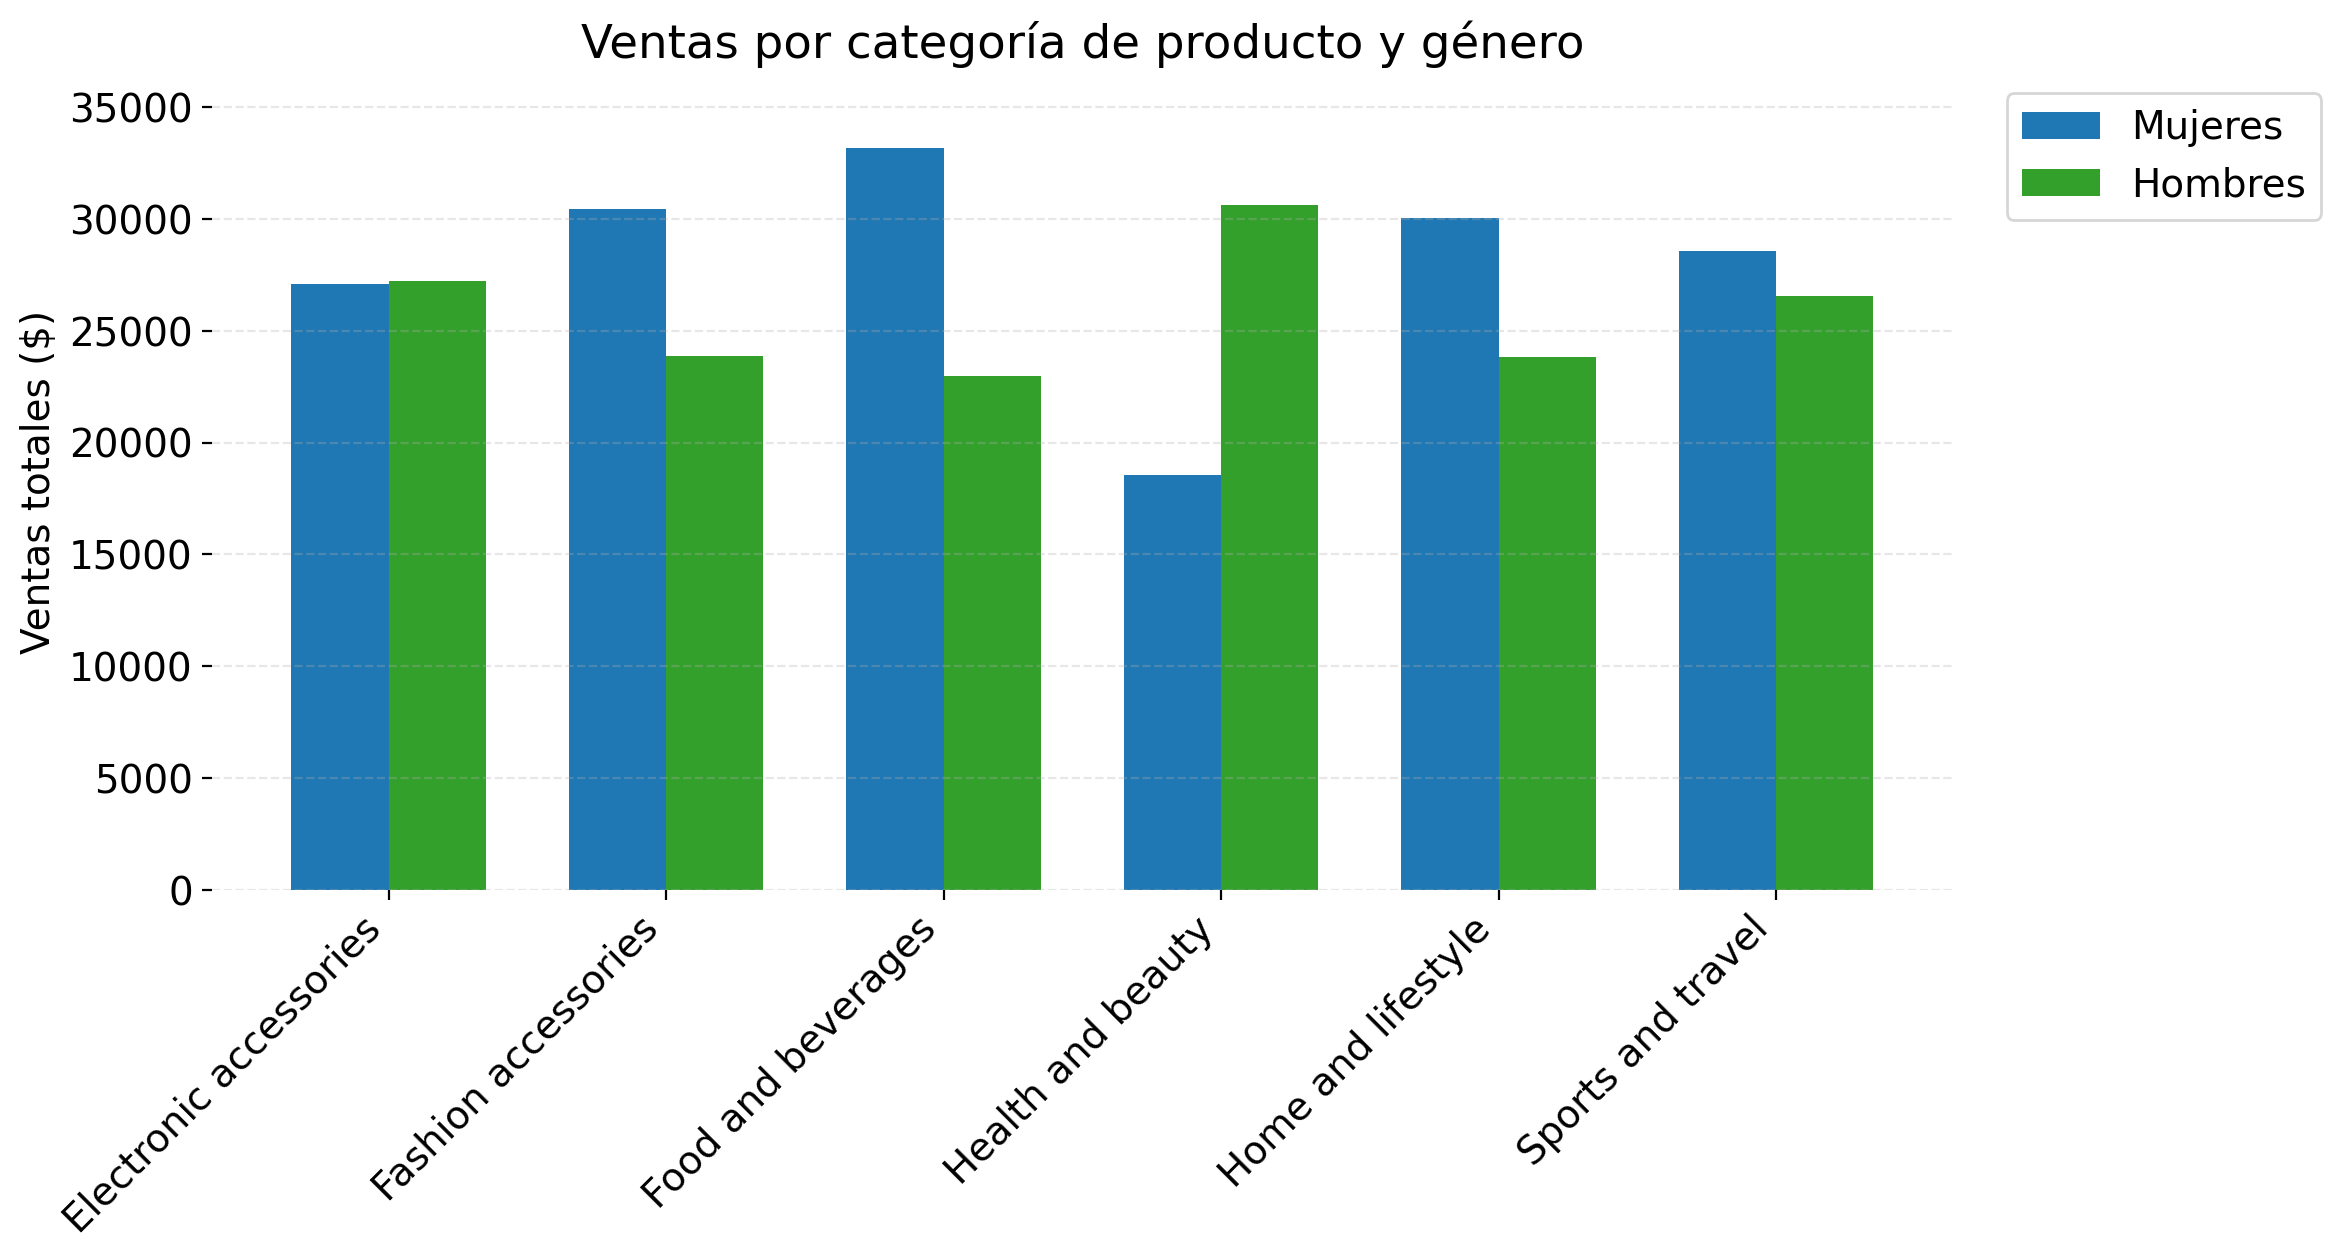

In [14]:
# Creamos el gráfico
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(product_gender_sales.index))
width = 0.35  # Ancho de las barras

bars1 = ax.bar(x - width/2, product_gender_sales['Female'], 
               width, label='Mujeres', color=plt.cm.Paired(0.1))
bars2 = ax.bar(x + width/2, product_gender_sales['Male'], 
               width, label='Hombres', color=plt.cm.Paired(0.3))

ax.set_ylabel('Ventas totales ($)')
ax.set_title('Ventas por categoría de producto y género')
ax.set_xticks(x)
ax.set_xticklabels(product_gender_sales.index, rotation=45, ha='right')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

ax.grid(True, axis='y', linestyle='--', alpha=0.3)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.subplots_adjust(right=0.85, bottom=0.2)

ax.margins(y=0.1)

plt.show()

## Ejercicio 5

Por úlltimo, nos gustar saber cuánto se vende cada día de la semana, de media, de cada línea de producto.

In [15]:
# Extraemos el día de la semana (0 = Lunes, 6 = Domingo)
supermarket_sales_df['Day'] = pd.to_datetime(supermarket_sales_df['Date']).dt.dayofweek

# Creamos un mapeo para los nombres de los días
days_map = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}

# Aplicamos el mapeo
supermarket_sales_df['Day_Name'] = supermarket_sales_df['Day'].map(days_map)

# Calculamos la media de ventas por día y línea de producto
daily_product_sales = supermarket_sales_df.groupby(['Day_Name', 'Product line'])['Total'].mean().unstack()

correct_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
daily_product_sales = daily_product_sales.reindex(correct_order)

daily_product_sales

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Day_Name,,,,,,
Lunes,257.483739,356.640083,300.555818,324.932192,304.767225,275.101313
Martes,348.652500,285.510750,378.780635,295.158259,350.396932,301.208654
Miércoles,270.272917,243.563625,339.045000,309.934026,340.779711,326.707500
Jueves,345.421125,367.899500,339.929625,293.814316,285.647526,320.862196
Viernes,285.185559,318.491950,239.917263,320.423654,286.475875,424.285370
Sábado,360.902889,307.969200,302.432177,390.018079,383.666937,342.991500
Domingo,320.593875,279.187125,337.539848,355.238250,377.259094,318.884562


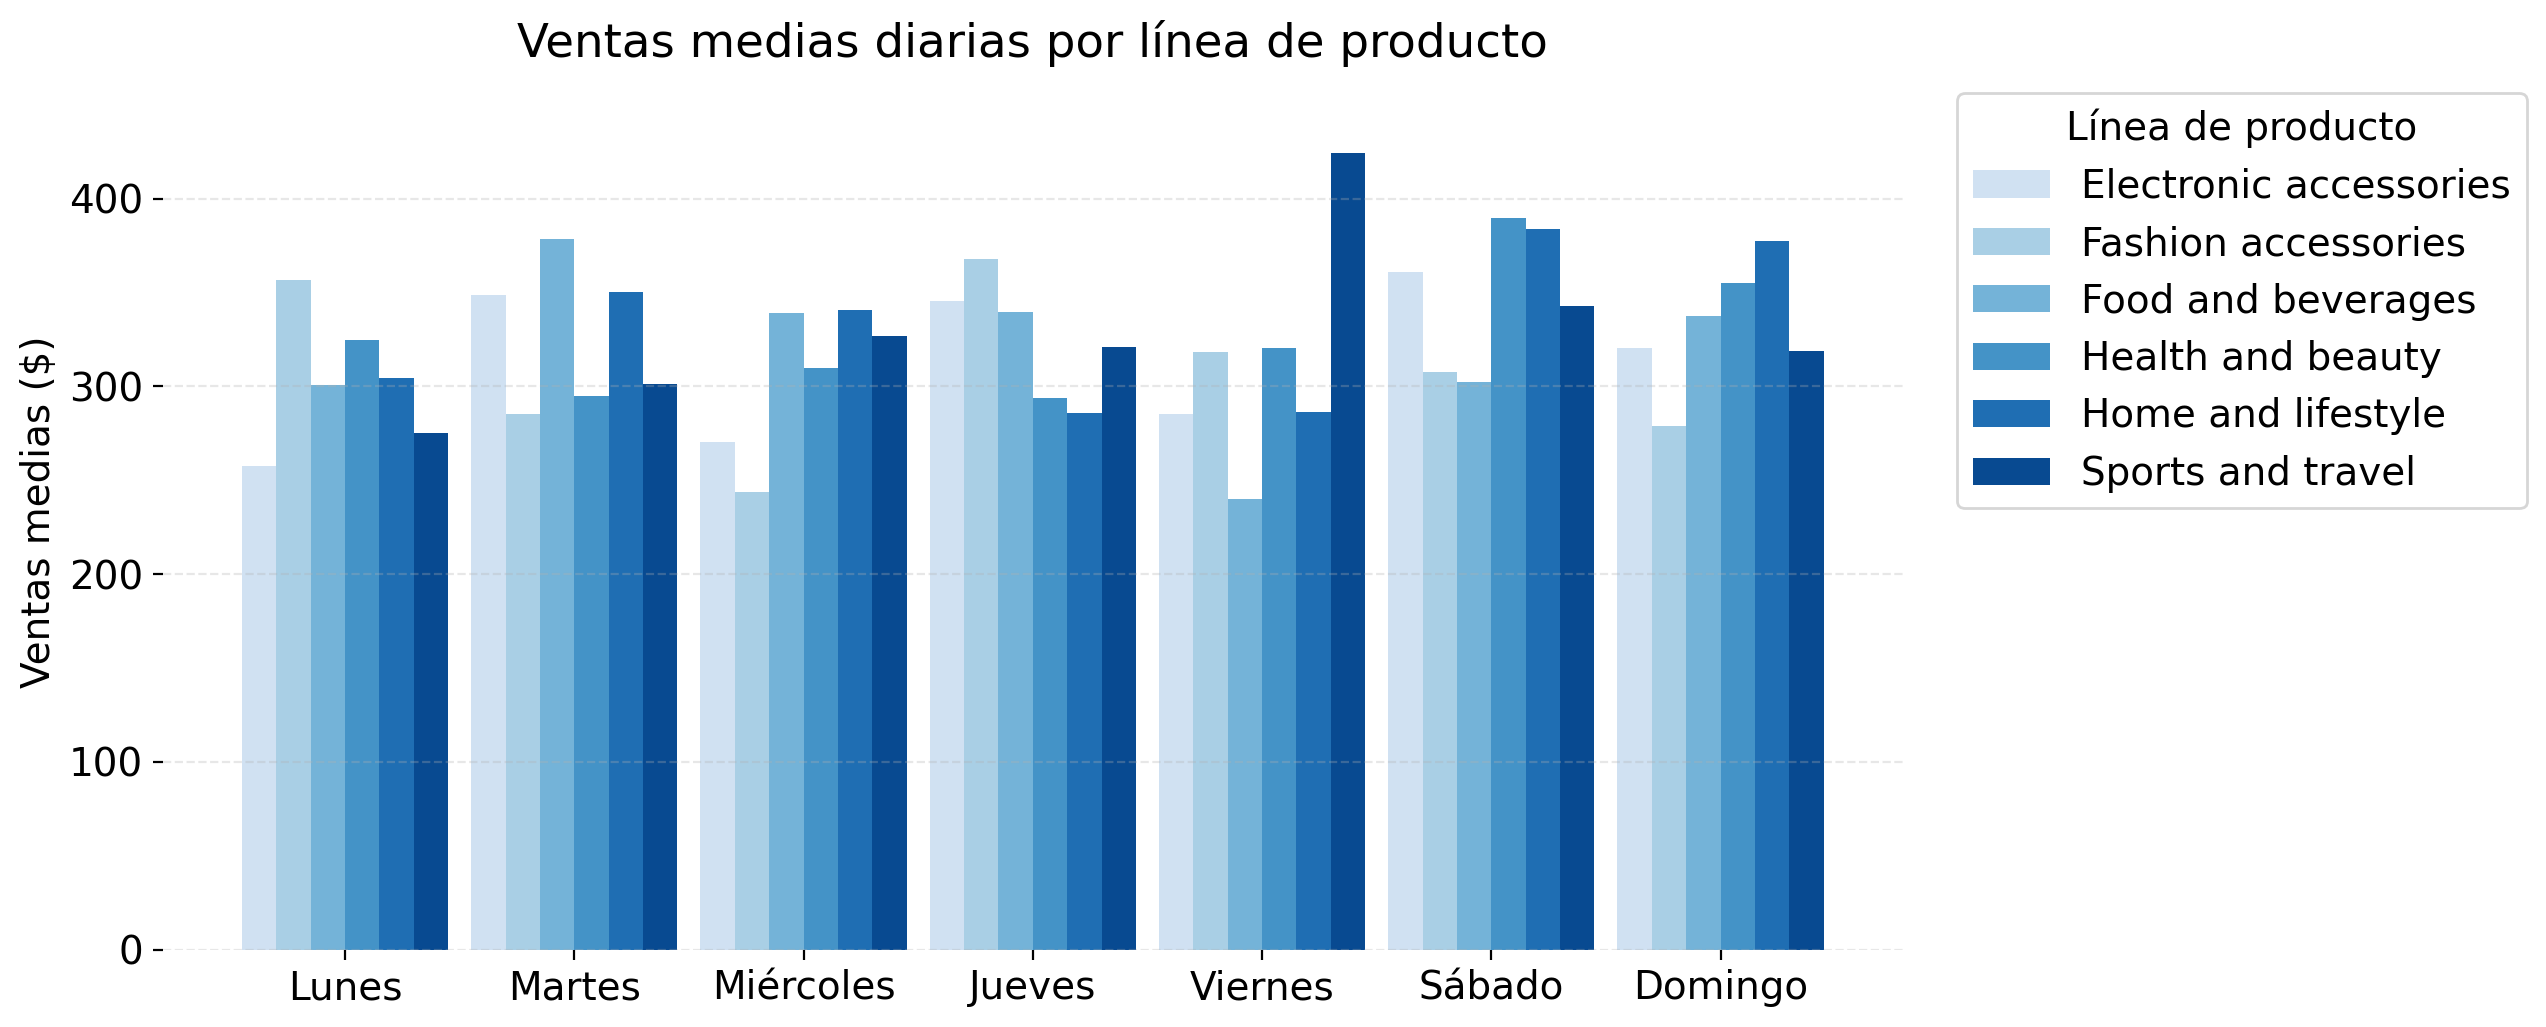

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(daily_product_sales.index))
width = 0.15  # Ancho de las barras (ajustado para 6 categorías)

colors = plt.cm.Blues(np.linspace(0.2, 0.9, len(daily_product_sales.columns)))

for i, product_line in enumerate(daily_product_sales.columns):
    offset = width * (i - len(daily_product_sales.columns)/2 + 0.5)
    bars = ax.bar(x + offset, 
                  daily_product_sales[product_line], 
                  width, 
                  label=product_line,
                  color=colors[i],
                  )        

ax.set_ylabel('Ventas medias ($)')
ax.set_title('Ventas medias diarias por línea de producto')
ax.set_xticks(x)
ax.set_xticklabels(daily_product_sales.index)

ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Línea de producto')

ax.grid(True, axis='y', linestyle='--', alpha=0.3)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.subplots_adjust(right=0.85, bottom=0.15)

ax.margins(y=0.1)

plt.show()